<a href="https://colab.research.google.com/github/Taj1920/Data_Analysis/blob/main/Uber_Analysis/UberRides_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

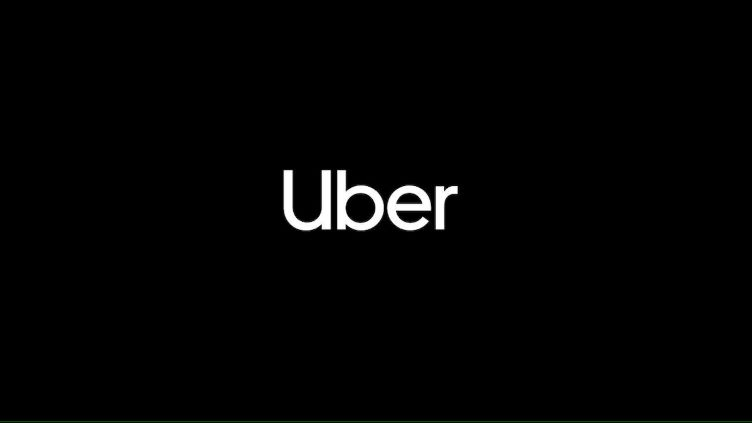

# UBER RIDES DATA ANALYSIS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#last row is unwanted -removing last row (1155)
df.drop(df.index[1155],inplace=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
#Removing duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [ ]:
#Resetting the index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
#Handling Nan values in PURPOSE column
df['PURPOSE']=df['PURPOSE'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.2+ KB


In [ ]:
#replacing Kar?chi with karchi
df['START']=df['START'].str.replace('Kar?chi','Karchi')
df['STOP']=df['STOP'].str.replace('Kar?chi','Karchi')

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#Feature Engineering using Date Columns

In [ ]:
df['START_DATE']=df['START_DATE'].str.replace('/','-')
df['END_DATE']=df['END_DATE'].str.replace('/','-')


df['START_DATE']=pd.to_datetime(df['START_DATE'])
df['END_DATE']=pd.to_datetime(df['END_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.2+ KB


In [ ]:
# # Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night
df['DATE']=pd.DatetimeIndex(df['START_DATE']).date
df['TIME']=pd.DatetimeIndex(df['START_DATE']).hour

out=[]
for i in df['TIME']:
  if 0<=i<=10:
    out.append('Morning')
  elif 11<=i<=15:
    out.append('Afternoon')
  elif 16<=i<=19:
    out.append('Evening')
  elif 20<=i<=24:
    out.append('Night')
df['DAY-NIGHT']=out
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,2016-12-31,1,Morning
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karchi,Unknown Location,3.9,Temporary Site,2016-12-31,13,Afternoon
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,Afternoon
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,Night


In [ ]:
#creating month column
df['MONTH']=[i.month for i in df['START_DATE']]
df['MONTH']=df['MONTH'].map({1:'JAN',  2:'FEB',  3:'MAR',  4:'APR',  5:'MAY',  6:'JUN',  7:'JUL',  8:'AUG',  9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC'})
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,JAN
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1,Morning,JAN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,JAN
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,JAN
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,JAN
...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,2016-12-31,1,Morning,DEC
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karchi,Unknown Location,3.9,Temporary Site,2016-12-31,13,Afternoon,DEC
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,Afternoon,DEC
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,Night,DEC


In [ ]:
#creating day column
df['DAY']=df['START_DATE'].dt.weekday
df['DAY']=df['DAY'].map({0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'})
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,JAN,FRI
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1,Morning,JAN,SAT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,JAN,SAT
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,JAN,TUE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,JAN,WED
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,2016-12-31,1,Morning,DEC,SAT
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karchi,Unknown Location,3.9,Temporary Site,2016-12-31,13,Afternoon,DEC,SAT
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,Afternoon,DEC,SAT
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,Night,DEC,SAT


# Count by Different columns

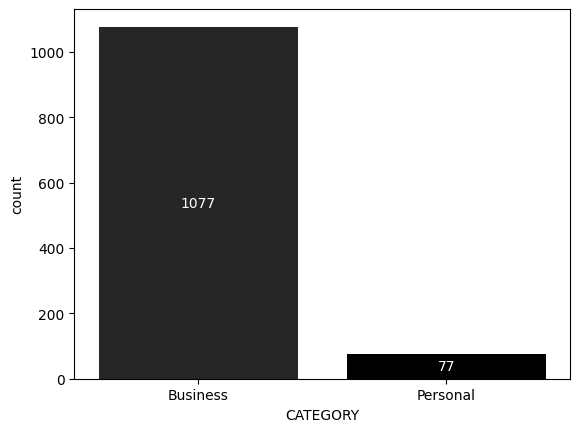

In [ ]:
a=sns.countplot(x='CATEGORY',data=df,hue='CATEGORY',palette='dark:black')
def data_label(a):
  for i in a.containers:
    a.bar_label(i,label_type='center',color='white')
data_label(a)

Count of Business category is more

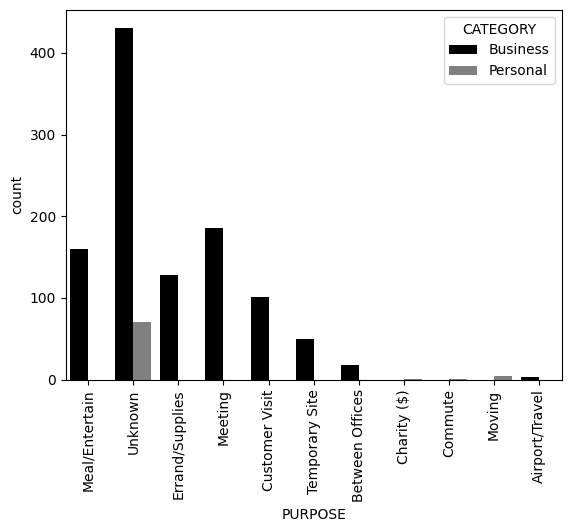

In [ ]:
uber_palette = sns.color_palette(["black","gray"])
a=sns.countplot(x='PURPOSE',data=df,hue='CATEGORY',palette=uber_palette)
plt.xticks(rotation=90)
plt.show()

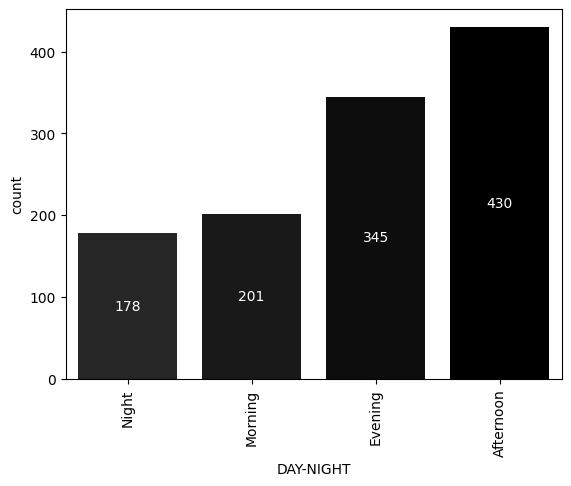

In [ ]:
a=sns.countplot(x='DAY-NIGHT',data=df,hue='DAY-NIGHT',palette='dark:black')
data_label(a)
plt.xticks(rotation=90)
plt.show()

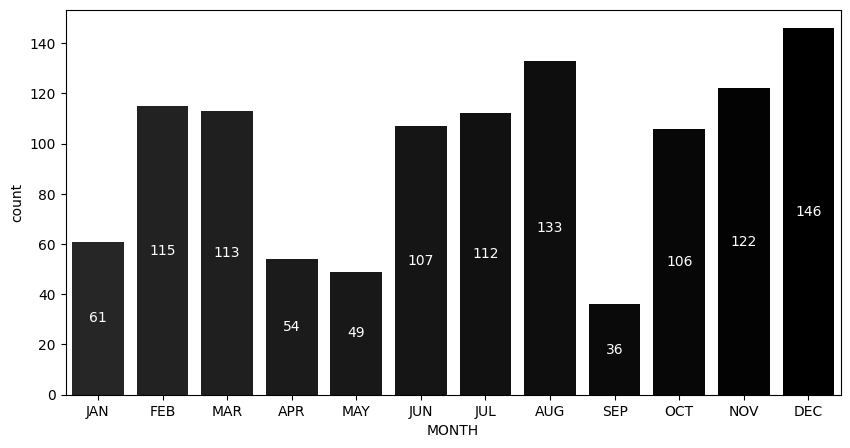

In [ ]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='MONTH',data=df,hue='MONTH',palette='dark:black')
data_label(a)
plt.show()

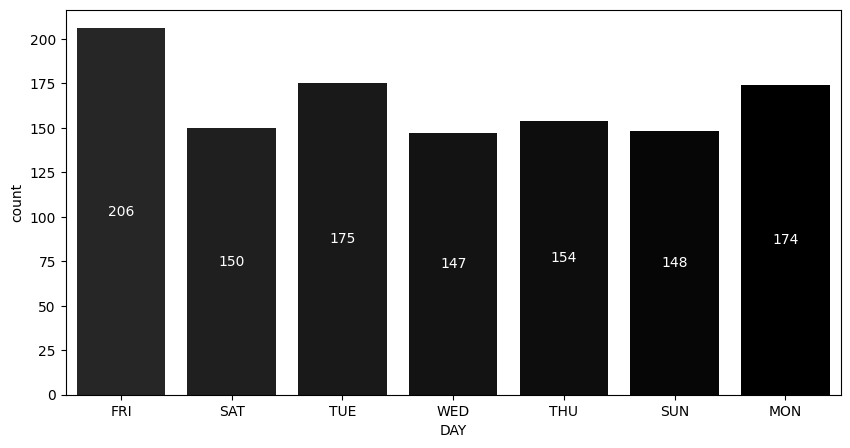

In [ ]:
plt.figure(figsize=(10,5))
a=sns.countplot(x='DAY',data=df,hue='DAY',palette='dark:black')
data_label(a)
plt.show()

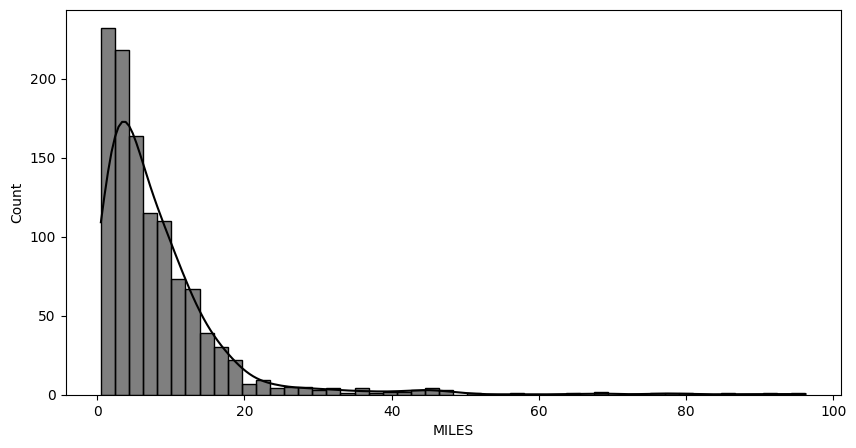

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='MILES',data=df[df['MILES']<100],kde=True,bins=50,color='black')
plt.show()

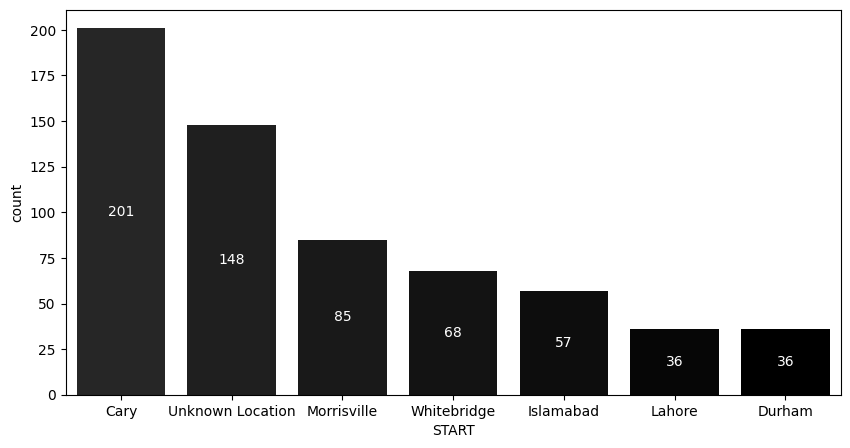

In [ ]:
df1=pd.DataFrame(df['START'].value_counts())
plt.figure(figsize=(10,5))
a=sns.barplot(x='START',y='count',data=df1[df1['count']>30],hue='START',palette='dark:black')
data_label(a)

# Conclusion:

#1.Most of the cabs are booked for  bussiness purpose, Meal/Entertain, and Meeting.

#2.Most of the cabs are booked in afternoon time.
#3.Most of the cabs are booked in  feb,mar,aug,nov,dec.
#4.Most of the cabs are booked on FRI,TUE and MON.
#5.Most of the cabs booked for the distance of 4-5 miles.
#6.Majorly people chooses cabs for the distance of 0-20 miles.
#7.For distance more than 20 miles cab counts is nearly negligible.
#8.Most of the cabs booked at the location Cary.